## Before we start, I need to say these:

- Before we start, input and output number is not in order. Because:
    - I prepared some codes after finishing my project.
    - And another reason is some codes are taking so much time I didn't want to wait for them.

# Importing necessary libraries

In [1]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd
import time

# Get request

- Let's start with a url!

In [2]:
url="https://autos.mercadolibre.com.ar/auto_Desde_450_ITEM*CONDITION_2230581_NoIndex_True"
#a sample of url

In [3]:
response=requests.get(url)
# Taking response from the web server

In [4]:
response.status_code
#Status code is 200 so it is normal
#I did it 🎉!

200

In [5]:
response.text
# gives you all HTML software of this URL in String. 

In [6]:
response.content
# gives you all HTML software of this URL in normal not string.

In [7]:
soup=BeautifulSoup(response.content,"lxml")
# "lxml" is the best and fastest parser.
# It is parsing HTML of this URL

In [8]:
soup.beautify
# Making more beauty

In [9]:
links=soup.find_all("a",{"class":"ui-search-result__content ui-search-link"})
# I found all anchors (links) of cars in this page.

In [10]:
print(links)
# We found these anchors:

[<a class="ui-search-result__content ui-search-link" href="https://auto.mercadolibre.com.ar/MLA-1218055940-volkswagen-tiguan-trendline-14-tsi-ma-_JM#position=1&amp;search_layout=grid&amp;type=item&amp;tracking_id=c16d540e-b6cd-4094-89b9-5fd1e5c60545" target="_blank" title="Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg"><div class="ui-search-result__content-wrapper shops__result-content-wrapper"><div class="ui-search-item__group ui-search-item__group--price shops__items-group"><div class="ui-search-item__group__element ui-search-price__part-without-link shops__items-group-details"><div class="ui-search-price ui-search-price--size-medium shops__price"><div class="ui-search-price__second-line shops__price-second-line"><span class="price-tag ui-search-price__part shops__price-part"><span class="price-tag-text-sr-only">10900000 pesos</span><span aria-hidden="true" class="price-tag-amount"><span class="price-tag-symbol">$</span><span class="price-tag-fraction">10.900.000</span></spa

In [11]:
print(len(links))
# We have 48 anchors in a URL.

48


In [12]:
urls=[x["href"] for x in links ]
# We extracted URLs of cars in a site 

In [13]:
for url in urls:
    print(url)

https://auto.mercadolibre.com.ar/MLA-1218055940-volkswagen-tiguan-trendline-14-tsi-ma-_JM#position=1&search_layout=grid&type=item&tracking_id=c16d540e-b6cd-4094-89b9-5fd1e5c60545
https://auto.mercadolibre.com.ar/MLA-1217303701-chevrolet-meriva-18-gl-plus-cgnc-ano-2012-liv-motors-_JM#position=2&search_layout=grid&type=item&tracking_id=c16d540e-b6cd-4094-89b9-5fd1e5c60545
https://auto.mercadolibre.com.ar/MLA-1217302811-jeep-compass-longitude-24-automatica-ano-2019-liv-motors-_JM#position=3&search_layout=grid&type=item&tracking_id=c16d540e-b6cd-4094-89b9-5fd1e5c60545
https://auto.mercadolibre.com.ar/MLA-1217058855-chevrolet-onix-2016-14-ltz-mt-98c-gnc-no-prisma-gol-c3-c4-a-_JM#position=4&search_layout=grid&type=item&tracking_id=c16d540e-b6cd-4094-89b9-5fd1e5c60545
https://auto.mercadolibre.com.ar/MLA-1217354195-jeep-compass-longitude-24-automatica-ano-2019-liv-motors-_JM#position=5&search_layout=grid&type=item&tracking_id=c16d540e-b6cd-4094-89b9-5fd1e5c60545
https://auto.mercadolibre.com.

> Okay now we found urls in just a page 

> Lets find all urls in 500 page

In [15]:
%%time
# This code is counting the time. 

all_urls=[]
# I opened a list for putting all links we find

last_page_num=500
# You can increase that or decrease, it is up to you
# So we already find 48 URLs in a page
# We expect to find 48*500=24000 links

for i in range(last_page_num):
    url=f"https://autos.mercadolibre.com.ar/auto_Desde_{i}_ITEM*CONDITION_2230581_NoIndex_True"
    # I find that after page change this specific place is changing
    
    response=requests.get(url)
    # We are making get request.
    
    time.sleep(1)
    # We sleep for a second because server could be block us due to more requests
    
    if i%50==0:
        print(i)
        #it is basicly a self checking process
        
    if response.status_code==200:
        #if we take response we will contunie
        
        soup=BeautifulSoup(response.content,"lxml")
        #we are parsering html with "lxml". "lxml" is best and fastest parser.
        
        soup.beautify
        #making more beauty
        
        links=soup.findAll("a",{"class":"ui-search-result__content ui-search-link"})
        #Finding anchors
        
        urls=[link["href"] for link in links ]
        #extracting urls
        
        all_urls.extend(urls)
        #since urls in list so we can extend it into all_urls list
    
    else:
        #if we could not take response we can not contunie :(
        
        pass
        
        #in this situtation just pass

0
50
100
150
200
250
300
350
400
450
CPU times: total: 1min 20s
Wall time: 28min 54s


In [16]:
len(all_urls)
#We have 24000 links
#I did it 🎉

24000

In [111]:
#I will save links because I dont want to extract links again

columns_=["links"]
#column_names

df=pd.DataFrame(columns=columns_)
#opening a DataFrame

df["links"]=all_urls
#We send all urls to "links" column

df.to_csv("links.csv",index=False)
#saving csv file


In [2]:
link_frame=pd.read_csv("links.csv")
#reading csv file

all_urls=link_frame["links"]
#taking all number of "links" column

In [19]:
url=all_urls[91]
url #sample url

'https://auto.mercadolibre.com.ar/MLA-1258821112-audi-a1-2011-14-ambition-tfsi-122cv-stronic-no-a3-abarth-a4-_JM#position=44&search_layout=grid&type=item&tracking_id=cd28f040-2585-4041-bbd9-b992738a440d'

In [6]:
response=requests.get(url)
response.status_code
# 200 is OK

200

In [7]:
soup=BeautifulSoup(response.content,"lxml")
table=soup.find_all("table")
table

[]

- I couldnt find table but there is table :( 
- So I understand that table is dynamic.
- I will use "**HTMLSession**" from "**requests_html**" library to find dynamics tables.

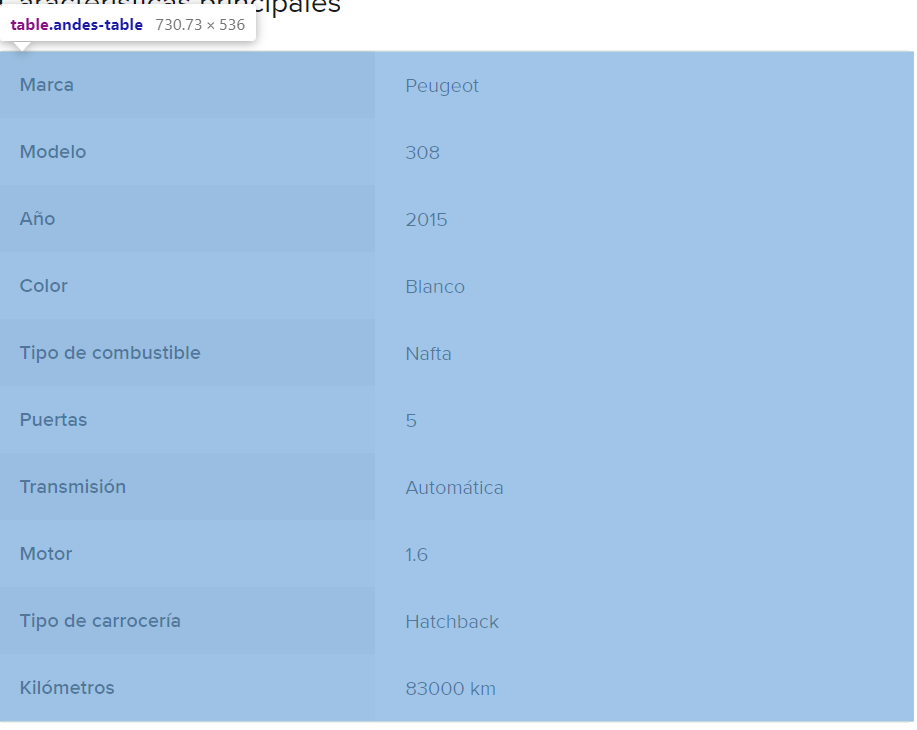

**Sample table**

# ...

In [11]:
from requests_html import HTMLSession
# Importing "HTMLSession"

In [23]:
session = HTMLSession()
#opening session

In [27]:
r=session.get(url)
# get request to sample url.

In [28]:
money=r.html.find(".andes-visually-hidden")[1].text
money
#I found money.

'14900 dólares'

In [29]:
table=r.html.find("span.andes-table__column--value")
table
#And I found table too.
#these are values of rows

[<Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>,
 <Element 'span' class=('andes-table__column--value',)>]

In [30]:
names=r.html.find(".andes-table__header")
names # names of rows.

[<Element 'th' class=('andes-table__header', 'andes-table__header--left', 'ui-pdp-specs__table__column', 'ui-pdp-specs__table__column-title')>,
 <Element 'th' class=('andes-table__header', 'andes-table__header--left', 'ui-pdp-specs__table__column', 'ui-pdp-specs__table__column-title')>,
 <Element 'th' class=('andes-table__header', 'andes-table__header--left', 'ui-pdp-specs__table__column', 'ui-pdp-specs__table__column-title')>,
 <Element 'th' class=('andes-table__header', 'andes-table__header--left', 'ui-pdp-specs__table__column', 'ui-pdp-specs__table__column-title')>,
 <Element 'th' class=('andes-table__header', 'andes-table__header--left', 'ui-pdp-specs__table__column', 'ui-pdp-specs__table__column-title')>,
 <Element 'th' class=('andes-table__header', 'andes-table__header--left', 'ui-pdp-specs__table__column', 'ui-pdp-specs__table__column-title')>,
 <Element 'th' class=('andes-table__header', 'andes-table__header--left', 'ui-pdp-specs__table__column', 'ui-pdp-specs__table__column-ti

In [32]:
for i in range(len(table)):
    print(f"Name : {names[i].text}\nValue : {table[i].text}\n-------------------------------------------------")

Name : Marca
Value : Audi
-------------------------------------------------
Name : Modelo
Value : A1
-------------------------------------------------
Name : Año
Value : 2011
-------------------------------------------------
Name : Color
Value : Blanco
-------------------------------------------------
Name : Tipo de combustible
Value : Nafta
-------------------------------------------------
Name : Puertas
Value : 3
-------------------------------------------------
Name : Transmisión
Value : Automática
-------------------------------------------------
Name : Motor
Value : 1.4
-------------------------------------------------
Name : Tipo de carrocería
Value : Hatchback
-------------------------------------------------
Name : Kilómetros
Value : 99000 km
-------------------------------------------------


># Let's take **all values from all urls**!

In [5]:
full_list_name=['Marca',
 'Modelo',
 'Año',
 'Color',
 'Tipo de combustible',
 'Puertas',
 'Transmisión',
 'Tipo de carrocería',
 'Kilómetros',
 'Motor']

In [59]:
%%time
#It is counting time

session = HTMLSession()
#Opening the session
#Do not forget to close session

broke_urls=[]
#I opened a list name as broke_urls because website is understanding that I want more request from server.
#And giving more request could make more slow the website for other users.
#As a consequence server is blocking me after a bit time.
#When I blocked from website I cant scrabe data from that url so I will append that url to the broke_urls list.
#I will use these urls later

money=[]
#For money datas.

brand=[]
#For brand datas.

model=[]
#For model datas.

year=[]
#For year datas.

color=[]
#For color datas.

fuel_type=[]
#For fuel_type datas.

door=[]
#For door datas.

gear=[]
#For gear datas.

motor=[]
#For motor datas.

body_type=[]
#For body_type datas.

kilometres=[]
#For kilometres datas.

counter=0
#It will count how much urls I could scrape

for url in all_urls:
    r=session.get(url)
    #taking request
    
    time.sleep(2)
    #this code is necessary; on the other hand, We will take more requests and then website will be block us
    
    if r.status_code==200:
        #If we could take response good we will countunie
        
        counter+=1
        if counter%50==0:
            print(counter)
        #I wanted to see data running per 50 urls
        
        money.append(r.html.find(".andes-visually-hidden")[1].text)
        #Taking money data
        
        table=r.html.find("span.andes-table__column--value")
        #finding table
        
        names=r.html.find(".andes-table__header")
        #finding name of values
        
        if len(table)==0:
            broke_urls.append(url)
            print("*********************************************")
        #Even if we taked response maybe it could be something wrong in url so I appended these kind of urls to the broke_urls list.
        
        if len(names)!=10:
            #Sometimes not everyone entering all values. There must be 10 values. If it is not, we will put "NaN" values.
            
            name_text=[name.text for name in names]
            diffrent=[x for x in full_list_name if x not in name_text]
            #Finding name of empty value. 
            
            for miss in diffrent:
            #Let's put "NaN" values, if there are empty values.
                if miss=="Marca":
                    brand.append("NaN")
                elif miss=="Modelo":
                    model.append("NaN")
                elif miss=="Año":
                    year.append("NaN")
                elif miss=="Color":
                    color.append("NaN")
                elif miss=="Tipo de combustible":
                    fuel_type.append("NaN")
                elif miss=="Puertas":
                    door.append("NaN")
                elif miss=="Transmisión":
                    gear.append("NaN")
                elif miss=="Motor":
                    motor.append("NaN")
                elif miss=="Tipo de carrocería":
                    body_type.append("NaN")
                elif miss=="Kilómetros":
                    kilometres.append("NaN")
                    
        for i in range(len(table)):
            #Taking values to the lists.
            if names[i].text=="Marca":
                brand.append(table[0].text)
            elif names[i].text=="Modelo":
                model.append(table[i].text)
            elif names[i].text=="Año":
                year.append(table[i].text)
            elif names[i].text=="Color":
                color.append(table[i].text)
            elif names[i].text=="Tipo de combustible":
                fuel_type.append(table[i].text)
            elif names[i].text=="Puertas":
                door.append(table[i].text)
            elif names[i].text=="Transmisión":
                gear.append(table[i].text)
            elif names[i].text=="Motor":
                motor.append(table[i].text)
            elif names[i].text=="Tipo de carrocería":
                body_type.append(table[i].text)
            elif names[i].text=="Kilómetros":
                kilometres.append(table[i].text)
    else:
        #If we will not take status code as 200
        #We will print Status Code and url
        
        print("Status_Code:\t{}".format(r.status_code))
        print(url)
        print("-------------------------------------------")
        time.sleep(60)
        #one minute sleep
        #After one minute I hope our block will be gone
        
        broke_urls.append(url)
        #takng url to the list.
        
session.close()
#closing session

*********************************************
50
100
150
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1179652748-toyota-2011-rav-4-24-5-p-l06-4x2-aut-full-_JM#position=19&search_layout=grid&type=item&tracking_id=af0a29fa-5ca0-4fd2-9527-f919fd938b9e
-------------------------------------------
200
250
Status_Code:	500
https://auto.mercadolibre.com.ar/MLA-1164449449-chevrolet-trailblazer-28-nueva-ltz-tdci-200cv-_JM#position=14&search_layout=grid&type=item&tracking_id=d58b95f0-5ef0-475d-9606-73afdfadfb7d
-------------------------------------------
300
350
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1241551381-toyota-hilux-l16-28-dc-4x4-tdi-srv-2017-_JM#position=18&search_layout=grid&type=item&tracking_id=5bcdae5e-d41a-4752-b49e-9984b0204e66
-------------------------------------------
400
450
500
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1255580821-dodge-journey-24-sxt-2011-_JM#position=24&search_layout=grid&type=item&tracking_id=6f7a75f4-5e8b-4de1-8d23-556a50

8400
8450
8500
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1248222433-vw-volkswagen-vento-2016-25-luxury-at-gnc-abasto-motors-_JM#position=5&search_layout=grid&type=item&tracking_id=6e7a8ff8-e57d-4103-b8d3-d91d59fba8ba
-------------------------------------------
8550
8600
8650
8700
8750
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1246884415-volkswagen-amarok-highline-pack-4x2-at-_JM#position=16&search_layout=grid&type=item&tracking_id=acfe09d1-306e-4021-9497-a795f90000ac
-------------------------------------------
8800
Status_Code:	500
https://auto.mercadolibre.com.ar/MLA-1243679952-ford-fiesta-kinetic-design-16-se-ano-2017-liv-motors-_JM#position=33&search_layout=grid&type=item&tracking_id=87fe38ac-2d17-4b56-91bb-53d321d64a78
-------------------------------------------
8850
8900
8950
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1243248465-volkswagen-saveiro-2020-16-highline-no-strada-oroch-hilux-a-_JM#position=27&search_layout=grid&type=item&tracking_id=5f

16100
16150
16200
16250
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1224467641-fluence-_JM#position=26&search_layout=grid&type=item&tracking_id=2d76392c-b5f1-4be4-ba10-73cc34c9c044
-------------------------------------------
16300
16350
16400
16450
16500
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1230566459-volkswagen-gol-trend-16-highline-sendai-usados-_JM#position=17&search_layout=grid&type=item&tracking_id=97185313-0622-4c45-8de6-d2221f8da8e9
-------------------------------------------
16550
16600
16650
16700
16750
16800
16850
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1224472696-renault-kangoo-_JM#position=19&search_layout=grid&type=item&tracking_id=03700390-6f99-4bef-be8a-a8758544d91a
-------------------------------------------
16900
16950
17000
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1223902713-renault-captur-intense-20-mt-2018-_JM#position=27&search_layout=grid&type=item&tracking_id=6f10ad58-7b8d-4db2-89eb-8a94195b5797
--------------

22650
22700
22750
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1214355020-vw-volkswagen-t-cross-2019-comfortline-at-abasto-motors-_JM#position=9&search_layout=grid&type=item&tracking_id=26be0c48-de66-4b1d-acb9-c4691deb53fd
-------------------------------------------
22800
22850
22900
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1213325303-renault-duster-2018-16-ph2-4x2-dynamique-autoargentina-_JM#position=12&search_layout=grid&type=item&tracking_id=e701e2f8-2a77-499b-82ed-6d1384e0196d
-------------------------------------------
22950
23000
23050
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1210741889-renault-duster-2013-confort-plus-16-4x2-concesionario-_JM#position=21&search_layout=grid&type=item&tracking_id=f120a78a-b717-452d-b801-75a64cdce061
-------------------------------------------
23100
23150
23200
23250
23300
Status_Code:	403
https://auto.mercadolibre.com.ar/MLA-1205609369-chevrolet-onix-lt-_JM#position=34&search_layout=grid&type=item&tracking_id=e27

In [68]:
#I will save broke_urls then I will try to take response again.
columns_=["links"]
df=pd.DataFrame(columns=columns_)
df["links"]=broke_urls
df.to_csv("broke_urls1.csv",index=False)

In [69]:
len(broke_urls)
#we have 111 links in 24000 links thats cool

111

In [97]:
#I will try to take response with all broke_urls links again.
#Since I believe I couldnt take datas from these links because of blocking.

#This is the same code from above.
%%time
session = HTMLSession()
last_broke_urls=[]
counter=0
for url in broke_urls:
    r=session.get(url)
    time.sleep(2)
    if r.status_code==200:
        counter+=1
        if counter%50==0:
            print(counter)
        money.append(r.html.find(".andes-visually-hidden")[1].text)
        table=r.html.find("span.andes-table__column--value")
        names=r.html.find(".andes-table__header")
        if len(table)==0:
            last_broke_urls.append(url)
            print("*********************************************")
        if len(names)!=10:
            name_text=[name.text for name in names]
            diffrent=[x for x in full_list_name if x not in name_text]
            for miss in diffrent:
                if miss=="Marca":
                    brand.append("NaN")
                elif miss=="Modelo":
                    model.append("NaN")
                elif miss=="Año":
                    year.append("NaN")
                elif miss=="Color":
                    color.append("NaN")
                elif miss=="Tipo de combustible":
                    fuel_type.append("NaN")
                elif miss=="Puertas":
                    door.append("NaN")
                elif miss=="Transmisión":
                    gear.append("NaN")
                elif miss=="Motor":
                    motor.append("NaN")
                elif miss=="Tipo de carrocería":
                    body_type.append("NaN")
                elif miss=="Kilómetros":
                    kilometres.append("NaN")
        for i in range(len(table)):
            if names[i].text=="Marca":
                brand.append(table[0].text)
            elif names[i].text=="Modelo":
                model.append(table[i].text)
            elif names[i].text=="Año":
                year.append(table[i].text)
            elif names[i].text=="Color":
                color.append(table[i].text)
            elif names[i].text=="Tipo de combustible":
                fuel_type.append(table[i].text)
            elif names[i].text=="Puertas":
                door.append(table[i].text)
            elif names[i].text=="Transmisión":
                gear.append(table[i].text)
            elif names[i].text=="Motor":
                motor.append(table[i].text)
            elif names[i].text=="Tipo de carrocería":
                body_type.append(table[i].text)
            elif names[i].text=="Kilómetros":
                kilometres.append(table[i].text)
    else:
        print("Status_Code:\t{}".format(r.status_code))
        print(url)
        print("-------------------------------------------")
        time.sleep(60)
        last_broke_urls.append(url)
session.close()

50
100
*********************************************
*********************************************
*********************************************
*********************************************
*********************************************
CPU times: total: 11.3 s
Wall time: 5min 29s


In [101]:
for i in last_broke_urls:
    print(i)
#Probably this cars has sold out while we scrabing; thus, we couldn't scrabe that links
#I wanted to look at links so I printed

https://auto.mercadolibre.com.ar/MLA-1201591219-ford-focus-titanium-automatico-mondeo-golf-vento-corolla-h-x-_JM#position=48&search_layout=grid&type=item&tracking_id=6905a7a2-b421-4e28-b5e1-d1a466aa7e9a
https://auto.mercadolibre.com.ar/MLA-1201591219-ford-focus-titanium-automatico-mondeo-golf-vento-corolla-h-x-_JM#position=47&search_layout=grid&type=item&tracking_id=eb750595-ccff-4145-96a3-f7c2811dd750
https://auto.mercadolibre.com.ar/MLA-1201591219-ford-focus-titanium-automatico-mondeo-golf-vento-corolla-h-x-_JM#position=46&search_layout=grid&type=item&tracking_id=f9ddacc3-74d9-4db7-8656-05431e690384
https://auto.mercadolibre.com.ar/MLA-1201591219-ford-focus-titanium-automatico-mondeo-golf-vento-corolla-h-x-_JM#position=44&search_layout=grid&type=item&tracking_id=6d7d8d5b-c1a0-44e0-b250-354e33ee0630
https://auto.mercadolibre.com.ar/MLA-1201591219-ford-focus-titanium-automatico-mondeo-golf-vento-corolla-h-x-_JM#position=43&search_layout=grid&type=item&tracking_id=90b949dc-6717-4e3e-8b2

In [102]:
len(money),len(brand),len(model),len(year),len(color),len(fuel_type),len(door),len(gear),len(motor),len(body_type),len(kilometres)

(24013, 24013, 24013, 24013, 24013, 24013, 24013, 24013, 24013, 24013, 24013)

**We have 24013 rows, not 24000. It is probably we put NaN values to links which we couldnt find anything about table and also we added them to the broke_urls list. So we try to take values from same pages.**

# Creating A DataFrame

In [104]:
import pandas as pd

In [105]:
columns_=["money","brand","model","year","color","fuel_type","door","gear","motor","body_type","kilometres"]
df=pd.DataFrame(columns=columns_)

In [106]:
df["money"]=money
df["brand"]=brand
df["model"]=model
df["year"]=year
df["color"]=color
df["fuel_type"]=fuel_type
df["door"]=door
df["gear"]=gear
df["motor"]=motor
df["body_type"]=body_type
df["kilometres"]=kilometres

In [107]:
money

['11290000 pesos',
 '10350000 pesos',
 '10850000 pesos',
 '35500 dólares',
 '19000 dólares',
 '5800000 pesos',
 '34500 dólares',
 '25000 dólares',
 '12300 dólares',
 '35500 dólares',
 '6800000 pesos',
 '38500 dólares',
 '20500 dólares',
 '3500000 pesos',
 '5990000 pesos',
 '41900 dólares',
 '2100000 pesos',
 '38500 dólares',
 '2940000 pesos',
 '2050000 pesos',
 '4120000 pesos',
 '4100000 pesos',
 '15000 dólares',
 '5099000 pesos',
 '8300000 pesos',
 '2800000 pesos',
 '4500000 pesos',
 '2400000 pesos',
 '5200000 pesos',
 '7500000 pesos',
 '2450000 pesos',
 '5200000 pesos',
 '10200000 pesos',
 '2450000 pesos',
 '2585000 pesos',
 '3150000 pesos',
 '4300000 pesos',
 '7589900 pesos',
 '1950000 pesos',
 '3050000 pesos',
 '3150000 pesos',
 '9389900 pesos',
 '3290000 pesos',
 '14900 dólares',
 '3150000 pesos',
 '3100000 pesos',
 '2750000 pesos',
 '3750000 pesos',
 '11290000 pesos',
 '10350000 pesos',
 '10850000 pesos',
 '35500 dólares',
 '19000 dólares',
 '5800000 pesos',
 '34500 dólares',
 '2

In [108]:
df.tail()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
24008,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24009,46990 dólares,Volkswagen,Golf,2018,Blanco,Nafta,5,Automática,2.0,Hatchback,15300 km
24010,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24011,46990 dólares,Volkswagen,Golf,2018,Blanco,Nafta,5,Automática,2.0,Hatchback,15300 km
24012,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df=df.replace("NaN",None)
#I wanted to change NaN values with None values.

In [114]:
df.shape

(24013, 11)

In [115]:
df.to_csv("car_price_argentina_last.csv",index=False)
#I saved my dataset

...................................................

In [2]:
df=pd.read_csv("car_price_argentina_last.csv")
#reading csv file

# EDA

In [3]:
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
0,11290000 pesos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10350000 pesos,Toyota,Corolla Cross,2022.0,Plateado,Nafta,5.0,Automática,NaN,SUV,500 km
2,10850000 pesos,Jeep,Compass,2022.0,Blanco,Nafta,5.0,Automática,2.4,SUV,500 km
3,35500 dólares,Jeep,Compass,2022.0,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500 km
4,19000 dólares,Citroën,C4 Cactus,2022.0,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550 km


In [4]:
df.shape

(24013, 11)

In [8]:
df.isnull().sum()

money           0
brand           0
model           0
year            0
color         525
fuel_type       0
door            0
gear           48
motor         302
body_type      48
kilometres      0
dtype: int64

In [5]:
nan_brands=df[df["brand"].isnull()]
nan_brands# I wanted to look at none brand values

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
0,11290000 pesos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7318,3489900 pesos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13451,2500000 pesos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16037,7500000 pesos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17722,5990000 pesos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22355,14500 dólares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23388,3600000 pesos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#I can't fill this values so I will drop that indexs.
nan_indexs=nan_brands.index
df.drop(nan_indexs,axis=0,inplace=True)

In [9]:
df.isnull().sum()
#I am looking again to the None values.

money           0
brand           0
model           0
year            0
color         525
fuel_type       0
door            0
gear           48
motor         302
body_type      48
kilometres      0
dtype: int64

In [10]:
nan_gears=df[df["gear"].isnull()]
nan_gears

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
8513,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8559,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8606,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8653,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8700,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8747,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8793,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8839,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8886,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km
8933,60000 dólares,Toyota,Hilux,2022.0,Negro,Diésel,4.0,NaN,2.8tdi 223cv,Pick-Up,4000 km


### **Wait what ???**
### **These are almost same cars!**

In [11]:
# Maybe it is just a coincidence. so I will look at to the none body_type values.
nan_body_types=df[df["body_type"].isnull()]
nan_body_types

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
11952,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
11999,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12046,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12092,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12139,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12186,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12233,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12280,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12327,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12373,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km


### **These are also same cars :(**
### **It seems like I scraped same cars data**

In [12]:
#Maybe I can find fill these body_type if I can find a car who has same features and also has body_type value.
df[(df["brand"]=="Fiat")&(df["model"]=="Uno")&(df["year"]==2010.0)]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
11952,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
11999,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12046,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12092,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12139,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12186,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12233,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12280,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12327,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km
12373,1760000 pesos,Fiat,Uno,2010.0,Rojo,Nafta,5.0,Manual,NaN,NaN,128000 km


### **All 2010 Fiat cars are same. So that means I scraped values of same cars.**

In [14]:
without_dup=df.drop_duplicates()
without_dup.shape
# I have just 510 cars.

(510, 11)

### **But how ?**

**I will look at to the links for understanding situtation.**

In [3]:
links=pd.read_csv("links.csv")
# reading links csv

links.head()

,links
0,https://auto.mercadolibre.com.ar/MLA-124597874...
1,https://auto.mercadolibre.com.ar/MLA-124621679...
2,https://auto.mercadolibre.com.ar/MLA-124597243...
3,https://auto.mercadolibre.com.ar/MLA-124619740...
4,https://auto.mercadolibre.com.ar/MLA-124597236...


In [4]:
link=links["links"][0]
link # a sample link

'https://auto.mercadolibre.com.ar/MLA-1245978740-toyota-corolla-cross-18-seg-hv-e-cvt-2022-_JM#position=1&search_layout=grid&type=item&tracking_id=95cc8504-780c-4c26-8f86-b58b3abb5076'

**I saw that there is a "position" values in link. I will examine that.**

In [6]:
link.split("position")[0]

'https://auto.mercadolibre.com.ar/MLA-1245978740-toyota-corolla-cross-18-seg-hv-e-cvt-2022-_JM#'

In [7]:
links["partial"]=[link.split("position")[0] for link in links["links"]]
#I am spliting all links from position.

In [27]:
indexs=links["partial"].drop_duplicates().index
#Taking indexs of unique links
unique_links=links.iloc[indexs]
unique_links.head()

,links,partial
0,https://auto.mercadolibre.com.ar/MLA-124597874...,https://auto.mercadolibre.com.ar/MLA-124597874...
1,https://auto.mercadolibre.com.ar/MLA-124621679...,https://auto.mercadolibre.com.ar/MLA-124621679...
2,https://auto.mercadolibre.com.ar/MLA-124597243...,https://auto.mercadolibre.com.ar/MLA-124597243...
3,https://auto.mercadolibre.com.ar/MLA-124619740...,https://auto.mercadolibre.com.ar/MLA-124619740...
4,https://auto.mercadolibre.com.ar/MLA-124597236...,https://auto.mercadolibre.com.ar/MLA-124597236...


In [30]:
unique_links.reset_index(inplace=True,drop=True)
#reindexing 

In [32]:
unique_links.tail()

,links,partial
541,https://auto.mercadolibre.com.ar/MLA-120088392...,https://auto.mercadolibre.com.ar/MLA-120088392...
542,https://auto.mercadolibre.com.ar/MLA-120025770...,https://auto.mercadolibre.com.ar/MLA-120025770...
543,https://auto.mercadolibre.com.ar/MLA-120082407...,https://auto.mercadolibre.com.ar/MLA-120082407...
544,https://auto.mercadolibre.com.ar/MLA-120020555...,https://auto.mercadolibre.com.ar/MLA-120020555...
545,https://auto.mercadolibre.com.ar/MLA-120025542...,https://auto.mercadolibre.com.ar/MLA-120025542...


**We have 546 unique links.**

## **Position of cars are changing. so I thought these are diffrent cars but these are same   cars :(**

# Cleaning Data

In [15]:
without_dup.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
1,10350000 pesos,Toyota,Corolla Cross,2022.0,Plateado,Nafta,5.0,Automática,NaN,SUV,500 km
2,10850000 pesos,Jeep,Compass,2022.0,Blanco,Nafta,5.0,Automática,2.4,SUV,500 km
3,35500 dólares,Jeep,Compass,2022.0,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500 km
4,19000 dólares,Citroën,C4 Cactus,2022.0,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550 km
5,5800000 pesos,Toyota,Corolla,2019.0,Gris,Nafta,4.0,Manual,1.8,Sedán,9000 km


In [16]:
without_dup["currency"]=[curr.split()[1] for curr in without_dup["money"]]
without_dup["money"]=[int(curr.split()[0]) for curr in without_dup["money"]]
without_dup.head()

C:\Users\ahmet\AppData\Local\Temp\ipykernel_11788\924516052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_dup["currency"]=[curr.split()[1] for curr in without_dup["money"]]
C:\Users\ahmet\AppData\Local\Temp\ipykernel_11788\924516052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_dup["money"]=[int(curr.split()[0]) for curr in without_dup["money"]]


,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
1,10350000,Toyota,Corolla Cross,2022.0,Plateado,Nafta,5.0,Automática,NaN,SUV,500 km,pesos
2,10850000,Jeep,Compass,2022.0,Blanco,Nafta,5.0,Automática,2.4,SUV,500 km,pesos
3,35500,Jeep,Compass,2022.0,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500 km,dólares
4,19000,Citroën,C4 Cactus,2022.0,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550 km,dólares
5,5800000,Toyota,Corolla,2019.0,Gris,Nafta,4.0,Manual,1.8,Sedán,9000 km,pesos


In [17]:
without_dup["year"]=without_dup["year"].astype("int")

C:\Users\ahmet\AppData\Local\Temp\ipykernel_11788\1801837618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_dup["year"]=without_dup["year"].astype("int")


In [18]:
without_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 1 to 23901
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int32  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    object 
 11  currency    510 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 49.8+ KB


In [19]:
without_dup.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
1,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500 km,pesos
2,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500 km,pesos
3,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500 km,dólares
4,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550 km,dólares
5,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000 km,pesos


In [20]:
without_dup.to_csv("argentina_cars.csv",index=False)

**Author :** 
# Ahmet Talha Bektaş 
**If you want to ask anything to me, you can easily contact with me!**

**📧[My email](ahmetnvshr04@gmail.com)** 

**🔗[My LinkedIn](https://www.linkedin.com/in/ahmet-talha-bekta%C5%9F-056844216)** 

**💻[My GitHub](https://github.com/ahmettalhabektas)** 

**👨‍💻[My Kaggle](https://medium.com/@ahmettalhabektas)**